# TA-Lib
下载地址：http://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib

In [1]:
import numpy as np
import pandas as pd
import talib
import tushare as ts
import matplotlib.pyplot as plt
%matplotlib inline

## 移动平均线指标

In [9]:
hist_data = ts.get_k_data('hs300', '2017-01-01', '2017-06-01')
hist_data['date'] = pd.to_datetime(hist_data['date'])
hist_data.set_index('date', inplace=True)

hist_data['sma_30'] = talib.SMA(hist_data['close'].values)
hist_data['sma_10'] = talib.SMA(hist_data['close'].values, timeperiod=10)

print(hist_data.head(50))

               open    close     high      low       volume   code  \
date                                                                 
2017-01-03  3313.95  3342.23  3345.26  3313.95   86567896.0  hs300   
2017-01-04  3340.56  3368.31  3369.57  3338.15   90050827.0  hs300   
2017-01-05  3368.34  3367.79  3373.41  3361.46   88336357.0  hs300   
2017-01-06  3366.85  3347.67  3368.87  3346.89   87459114.0  hs300   
2017-01-09  3345.75  3363.90  3366.22  3344.35   83707942.0  hs300   
2017-01-10  3361.64  3358.27  3370.51  3354.09   83819160.0  hs300   
2017-01-11  3355.80  3334.50  3366.63  3334.30   91071438.0  hs300   
2017-01-12  3332.69  3317.62  3343.13  3315.96   81239135.0  hs300   
2017-01-13  3317.96  3319.91  3338.17  3309.37   84180589.0  hs300   
2017-01-16  3314.15  3319.45  3322.78  3264.21  157779135.0  hs300   
2017-01-17  3305.60  3326.36  3327.38  3292.20   69453328.0  hs300   
2017-01-18  3323.34  3339.37  3350.96  3320.41   70623227.0  hs300   
2017-01-19  3330.95 

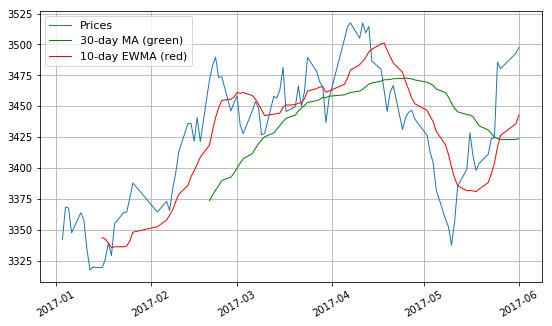

In [10]:
plt.figure(figsize=(9, 5))
plt.plot(hist_data['close'], lw=1, label='Prices')
plt.plot(hist_data['sma_30'], 'g', lw=1, label='30-day MA (green)')
plt.plot(hist_data['sma_10'], 'r', lw=1, label='10-day EWMA (red)')
plt.legend(loc=2, prop={'size': 11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

## 布林线指标

In [13]:
upper, middle, lower = talib.BBANDS(hist_data['close'].values, matype=talib.MA_Type.T3)
hist_data['BB_upper'] = upper
hist_data['BB_middle'] = middle
hist_data['BB_lower'] = lower
print(hist_data.head(50))

               open    close     high      low       volume   code  \
date                                                                 
2017-01-03  3313.95  3342.23  3345.26  3313.95   86567896.0  hs300   
2017-01-04  3340.56  3368.31  3369.57  3338.15   90050827.0  hs300   
2017-01-05  3368.34  3367.79  3373.41  3361.46   88336357.0  hs300   
2017-01-06  3366.85  3347.67  3368.87  3346.89   87459114.0  hs300   
2017-01-09  3345.75  3363.90  3366.22  3344.35   83707942.0  hs300   
2017-01-10  3361.64  3358.27  3370.51  3354.09   83819160.0  hs300   
2017-01-11  3355.80  3334.50  3366.63  3334.30   91071438.0  hs300   
2017-01-12  3332.69  3317.62  3343.13  3315.96   81239135.0  hs300   
2017-01-13  3317.96  3319.91  3338.17  3309.37   84180589.0  hs300   
2017-01-16  3314.15  3319.45  3322.78  3264.21  157779135.0  hs300   
2017-01-17  3305.60  3326.36  3327.38  3292.20   69453328.0  hs300   
2017-01-18  3323.34  3339.37  3350.96  3320.41   70623227.0  hs300   
2017-01-19  3330.95 

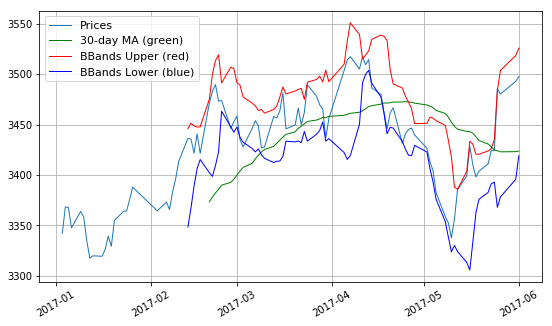

In [14]:
plt.figure(figsize=(9, 5))
plt.plot(hist_data['close'], lw=1, label='Prices')
plt.plot(hist_data['sma_30'], 'g', lw=1, label='30-day MA (green)')
plt.plot(hist_data['BB_upper'], 'r', lw=1, label='BBands Upper (red)')
plt.plot(hist_data['BB_lower'], 'b', lw=1, label='BBands Lower (blue)')
plt.legend(loc=2, prop={'size': 11})
plt.grid(True)
plt.setp(plt.gca().get_xticklabels(), rotation=30)
plt.show()

## 动量指标

In [16]:
hist_data['mtm'] = talib.MOM(hist_data['close'].values, timeperiod=5)
print(hist_data.head(10))

               open    close     high      low       volume   code  sma_30  \
date                                                                         
2017-01-03  3313.95  3342.23  3345.26  3313.95   86567896.0  hs300     NaN   
2017-01-04  3340.56  3368.31  3369.57  3338.15   90050827.0  hs300     NaN   
2017-01-05  3368.34  3367.79  3373.41  3361.46   88336357.0  hs300     NaN   
2017-01-06  3366.85  3347.67  3368.87  3346.89   87459114.0  hs300     NaN   
2017-01-09  3345.75  3363.90  3366.22  3344.35   83707942.0  hs300     NaN   
2017-01-10  3361.64  3358.27  3370.51  3354.09   83819160.0  hs300     NaN   
2017-01-11  3355.80  3334.50  3366.63  3334.30   91071438.0  hs300     NaN   
2017-01-12  3332.69  3317.62  3343.13  3315.96   81239135.0  hs300     NaN   
2017-01-13  3317.96  3319.91  3338.17  3309.37   84180589.0  hs300     NaN   
2017-01-16  3314.15  3319.45  3322.78  3264.21  157779135.0  hs300     NaN   

              sma_10  BB_upper  BB_middle  BB_lower    mtm  
da

## 其余指标请参考: 
https://github.com/mrjbq7/ta-lib